<a href="https://colab.research.google.com/github/AzlinRusnan/Airlines_Performance/blob/main/Analysis_of_Airline_On_Time_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **Q1. What are the optimal times of day, days of the week, and times of the year for minimizing flight delays?**

In [80]:
# Optimal times of day for minimizing flight delays

file_path = '/content/gdrive/MyDrive/Data Management/avg_hourly_delay'
avg_hourly_delay = pd.read_csv(file_path, header=None, names=['hour', 'avg_delay'])


# Check the shape of the DataFrame
print(f"Number of rows: {avg_hourly_delay.shape[0]}")
print(f"Number of columns: {avg_hourly_delay.shape[1]}\n")

# Display the first few rows to verify content
print(avg_hourly_delay.head())

Number of rows: 62
Number of columns: 2

   hour  avg_delay
0   0.0  -5.000000
1   1.0  -1.000000
2   5.0 -12.233333
3  10.0   7.387505
4  11.0   8.635226


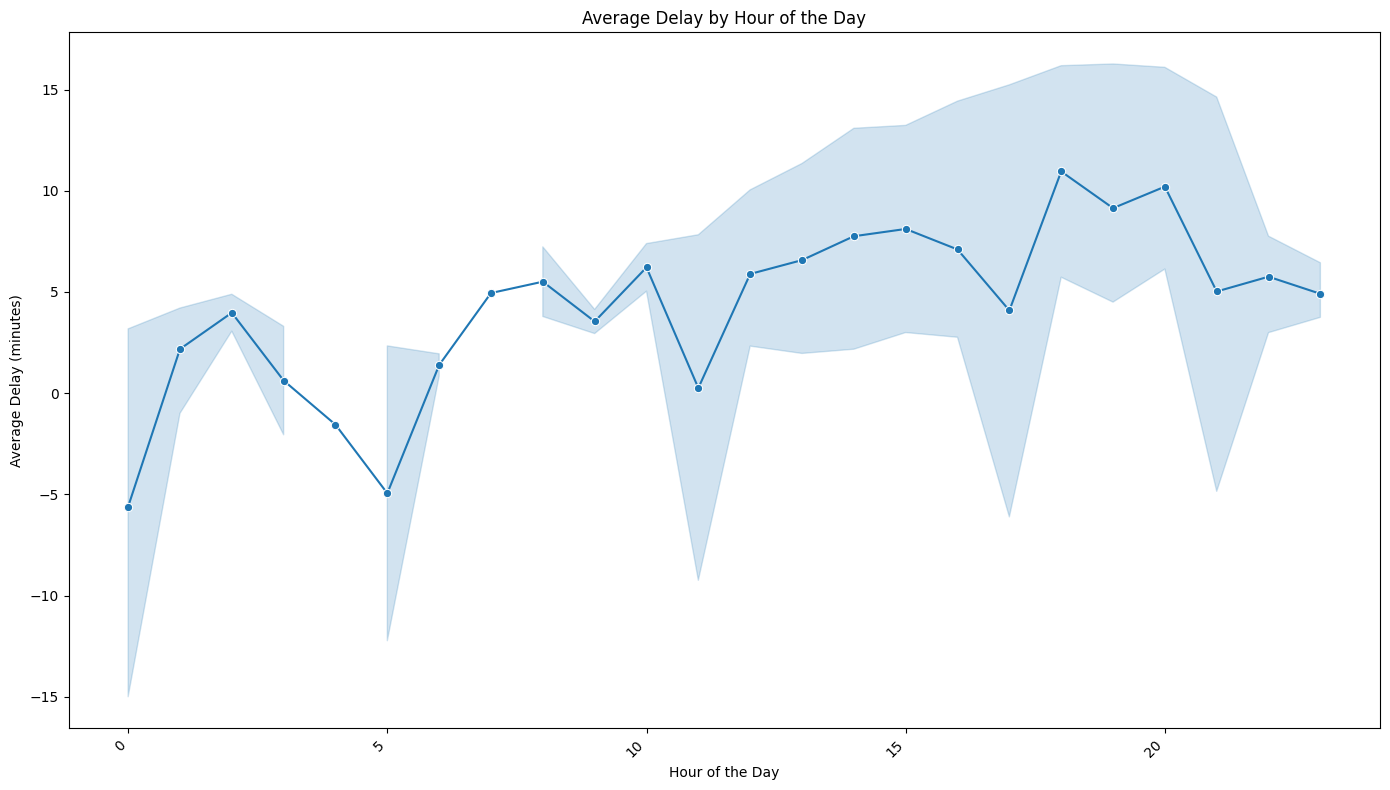

In [82]:
# Remove non-finite values
avg_hourly_delay['hour'] = pd.to_numeric(avg_hourly_delay['hour'], errors='coerce')
avg_hourly_delay = avg_hourly_delay.dropna(subset=['hour'])

# Convert hour to integers and ensure they are within the correct range (0-23)
avg_hourly_delay['hour'] = avg_hourly_delay['hour'].astype(float).astype(int) % 24

# Sort by hour to ensure proper ordering
avg_hourly_delay = avg_hourly_delay.sort_values('hour')

plt.figure(figsize=(14, 8))
sns.lineplot(x='hour', y='avg_delay', data=avg_hourly_delay, marker='o')
plt.title('Average Delay by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### **Insights:**

1. **Peak Delay Times:**

- The plot shows that the highest average delays occur between hours 18 (6PM) and 20 (8PM). These hours consistently show higher delays, with some peaks reaching around 15 minutes. This suggests that flights scheduled during the early to late afternoon are more likely to experience significant delays.

2. **Low or Negative Delay Times:**

- Negative delays (indicating early arrivals) are observed around midnight (hour 0), early morning (hours 4 and 5). This is a positive indicator of efficiency during these hours, suggesting that flights tend to arrive earlier than scheduled.

3. **Relatively Stable Hours:**

- Some hours, such as 1AM to 7AM, show more stable average delays with smaller variations.

#### **Recommendation:**

1. **Operational Adjustments:**

- Focus on peak delay hours (1 PM to 5 PM) to understand the causes of delays. This could involve reviewing scheduling practices, improving turnaround times, or allocating additional resources during these hours.

2. **Scheduling Considerations:**

- Passengers looking to minimize their risk of delays might prefer flights scheduled during early morning (before 6 AM) or late evening (after 9 PM), as these times tend to have lower average delays.

3. **Resource Allocation:**

- Airports could allocate more resources, such as staff and gates, during peak delay hours to reduce delays and improve efficiency.

---



In [34]:
# Optimal days of the week for minimizing flight delays

file_path = '/content/gdrive/MyDrive/Data Management/avg_weekly_delay'
avg_weekly_delay = pd.read_csv(file_path, header=None, names=['day', 'avg_delay'])

# Check the shape of the DataFrame
print(f"Number of rows: {avg_weekly_delay.shape[0]}")
print(f"Number of columns: {avg_weekly_delay.shape[1]}\n")

# Display the first few rows to verify content
print(avg_weekly_delay.head())

Number of rows: 8
Number of columns: 2

   day  avg_delay
0  1.0  10.736384
1  2.0  10.584612
2  3.0   7.776017
3  4.0  10.248991
4  5.0  14.630594


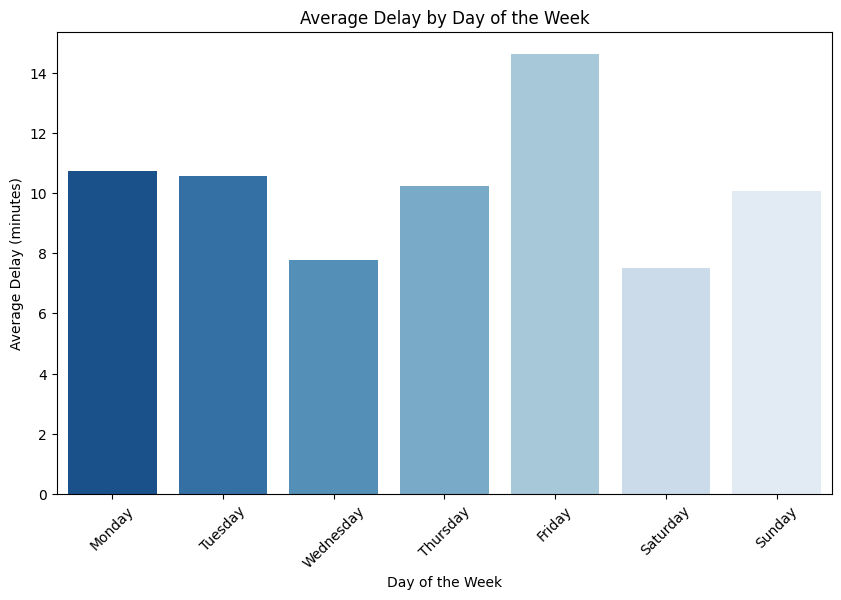

In [35]:
# Mapping day numbers to day names
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
avg_weekly_delay['day'] = avg_weekly_delay['day'].map(day_mapping)

plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='avg_delay', data=avg_weekly_delay, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Blues_r')
plt.title('Average Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

#### **Insights:**

1. **Peak Delay Day:**

- The plot shows that the highest average delays occur on Friday. This suggests that flights on Fridays are more likely to experience significant delays compared to other days of the week.

2. **Low Delay Days:**

- The lowest average delays are observed on Wednesday and Saturday. These days have relatively fewer delays, making them preferable for passengers looking to minimize the risk of delays.

3. **Moderate Delay Days:**

- Monday, Tuesday, Thursday, and Sunday have moderate average delays, falling between the extremes of Wednesday/Saturday and Friday.

#### **Recommendation:**

1. **Scheduling Considerations:**

- Passengers looking to minimize their risk of delays might prefer to travel on Wednesdays and Saturdays, as these days have the lowest average delays.

2. **Resource Allocation:**

- Airports and airlines could allocate more resources, such as staff and gates, on Fridays to reduce delays and improve efficiency.

---



In [32]:
# Optimal times of the year for minimizing flight delays

file_path = '/content/gdrive/MyDrive/Data Management/avg_monthly_delay'
avg_monthly_delay = pd.read_csv(file_path, header=None, names=['month', 'avg_delay'])


# Check the shape of the DataFrame
print(f"Number of rows: {avg_monthly_delay.shape[0]}")
print(f"Number of columns: {avg_monthly_delay.shape[1]}\n")

# Display the first few rows to verify content
print(avg_monthly_delay)

Number of rows: 5
Number of columns: 2

   month  avg_delay
0    1.0  10.188856
1    2.0  13.077837
2    3.0  11.192365
3    4.0   6.807297
4    NaN        NaN


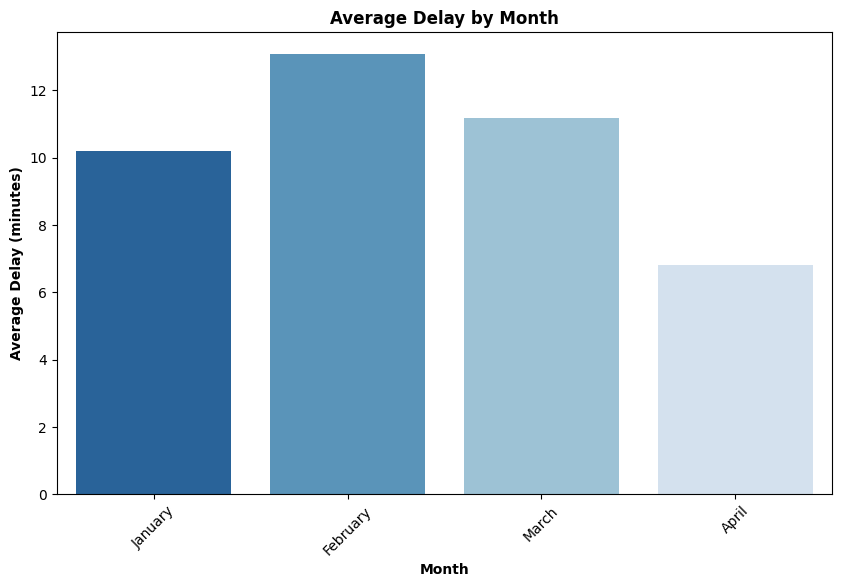

In [33]:
# Mapping month numbers to month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
avg_monthly_delay['month'] = avg_monthly_delay['month'].map(month_mapping)

# Visualization for average monthly delay
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='avg_delay', data=avg_monthly_delay, order=['January', 'February', 'March', 'April'], palette='Blues_r')
plt.title('Average Delay by Month', weight = "bold")
plt.xlabel('Month', weight = "bold")
plt.ylabel('Average Delay (minutes)', weight = "bold")
plt.xticks(rotation=45)
plt.show()

#### **Insights:**

1. **Peak Delay Month:**

- February (month 2) has the highest average delays, it indicates that flights in February are more likely to experience significant delays compared to other months.

2. **Low Delay Month:**

- April (month 4) has the lowest average delays, this suggests that flights in April are less likely to be delayed.

**Hence, optimal time of the year to minimise delay is on month January**

---



### **Q2. What are the primary factors contributing to flight delays??**

In [71]:
file_path = '/content/gdrive/MyDrive/Data Management/primary_delay_factors'
primary_delay_factors = pd.read_csv(file_path, header=None, names=['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'])


# Check the shape of the DataFrame
print(f"Number of rows: {primary_delay_factors.shape[0]}")
print(f"Number of columns: {primary_delay_factors.shape[1]}\n")

# Display the first few rows to verify content
print(primary_delay_factors)

Number of rows: 1
Number of columns: 5

   carrier_delay  weather_delay  nas_delay  security_delay  \
0        9208911        1717647    9445962           47035   

   late_aircraft_delay  
0             12262628  


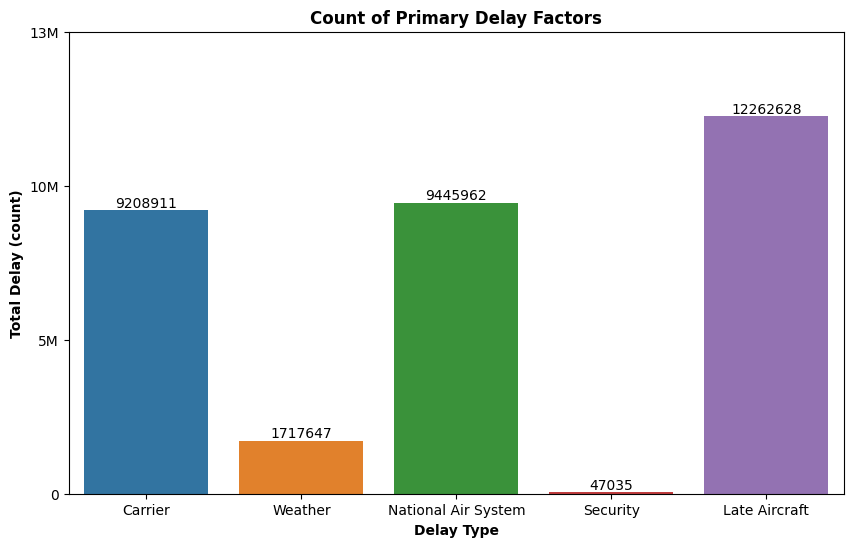

In [41]:
# Melting the DataFrame
primary_delay_factors_melted = primary_delay_factors.melt(var_name='delay_type', value_name='count')

# Calculate total delays for percentage calculation
total_delays = primary_delay_factors_melted['count'].sum()

# Colors from the pie chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Visualization for total delay factors
plt.figure(figsize=(10, 6))
g = sns.barplot(x='delay_type', y='count', data=primary_delay_factors_melted, palette=colors)
plt.title('Count of Primary Delay Factors', weight='bold')
plt.xlabel('Delay Type', weight='bold')
plt.ylabel('Total Delay (count)', weight='bold')

# Annotate each bar with the count and percentage
for bar in range(primary_delay_factors_melted.shape[0]):
    count = primary_delay_factors_melted['count'].iloc[bar]
    pct = (primary_delay_factors_melted['count'].iloc[bar] / total_delays) * 100
    pct = round(pct, 2)
    plt.text(x=bar, y=count, s=f"{count}", va='bottom', ha='center')

# Set y-axis scale and labels
plt.yticks([0, 5e6, 1e7, 1.5e7], ['0', '5M', '10M', '13M'])
g.set_xticklabels(['Carrier', 'Weather', 'National Air System', 'Security', 'Late Aircraft'])

plt.show()

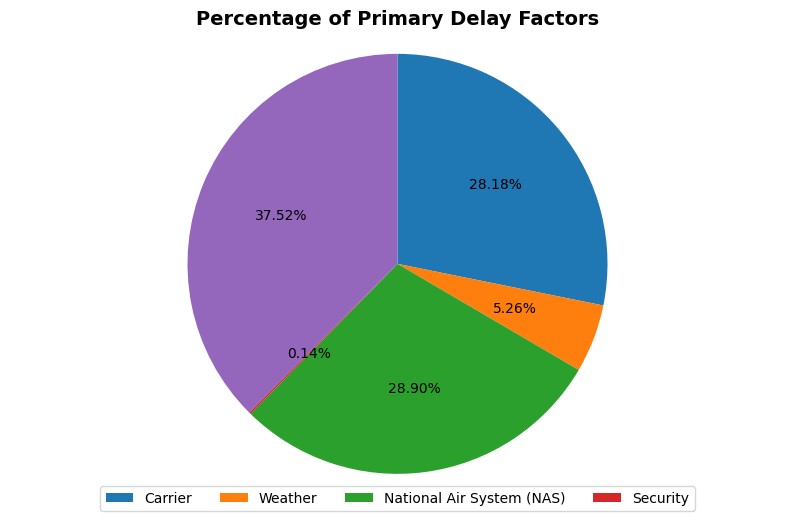

In [78]:
primary_delay_factors_melted = primary_delay_factors.melt(var_name='delay_type', value_name='total_delay')

# Calculate the total delay to get the percentage
total_delay_sum = primary_delay_factors_melted['total_delay'].sum()
primary_delay_factors_melted['percentage'] = (primary_delay_factors_melted['total_delay'] / total_delay_sum) * 100

# Define colors, labels, and explode settings
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
labels = ['Carrier', 'Weather', 'National Air System (NAS)', 'Security']

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(primary_delay_factors_melted['total_delay'], autopct='%.2f%%',
        startangle=90, counterclock=False, colors=colors, textprops={'color':'black'})

# Title
plt.title("Percentage of Primary Delay Factors", weight='bold', size=14)

# Legend
plt.legend(labels, loc=8, bbox_to_anchor=(0.5, -0.05), ncol=5)

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### **Insights:**

Primary delay factor is from **Late Aircraft** and **National Air System (NAS)**

- **Late Aircraft** and **NAS delays** are the primary contributors to flight delays, representing over **66%** of all delays combined.



---



### **Q3. What factors predominantly lead to flight cancellations?**

In [39]:
file_path = '/content/gdrive/MyDrive/Data Management/cancellation_reasons'
cancellation_reasons = pd.read_csv(file_path, header=None, names=['cancellation_code', 'count'])

# Check the shape of the DataFrame
print(f"Number of rows: {cancellation_reasons.shape[0]}")
print(f"Number of columns: {cancellation_reasons.shape[1]}\n")

# Display the first few rows to verify content
print(cancellation_reasons)

Number of rows: 4
Number of columns: 2

  cancellation_code  count
0                 A  26075
1                 B  25744
2                 C  12617
3                 D      6


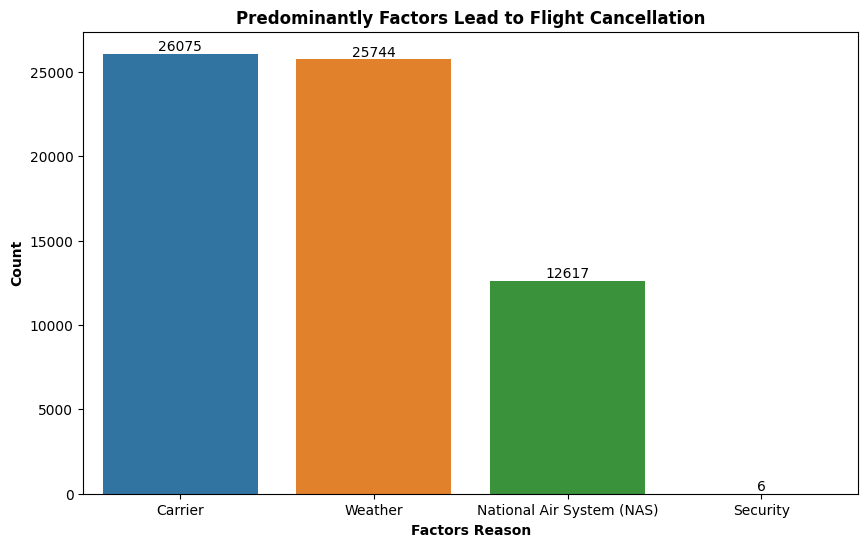

In [47]:
# Visualize the data

cancellation_mapping = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National Air System (NAS)',
    'D': 'Security'
}

# Map the cancellation codes to descriptions
cancellation_reasons['description'] = cancellation_reasons['cancellation_code'].map(cancellation_mapping)

# Visualization for cancellation reasons
plt.figure(figsize=(10, 6))
sns.barplot(x='description', y='count', data=cancellation_reasons, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Predominantly Factors Lead to Flight Cancellation',weight='bold')
plt.xlabel('Factors Reason',weight='bold')
plt.ylabel('Count',weight='bold')

# Annotate each bar with the count and percentage
for bar in range(cancellation_reasons.shape[0]):
    count = cancellation_reasons['count'].iloc[bar]
    pct = round(pct, 2)
    plt.text(x=bar, y=count, s=f"{count}", va='bottom', ha='center')

plt.show()

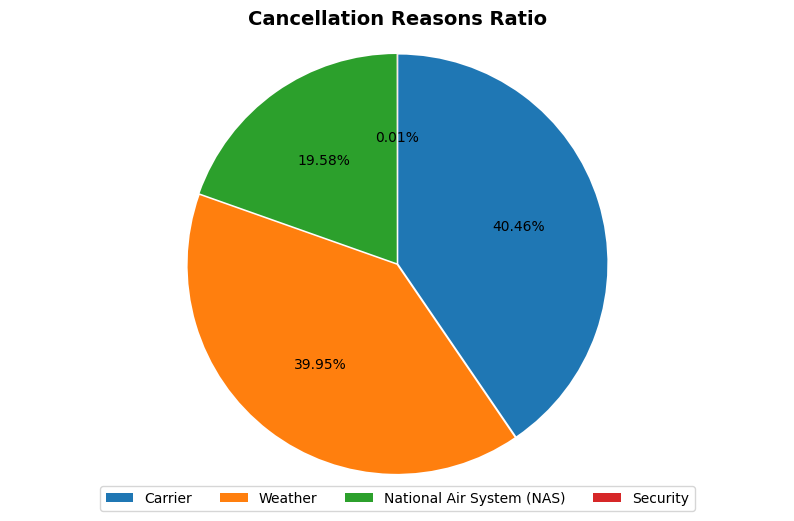

In [79]:
# Dictionary for mapping cancellation codes to descriptions
cancellation_mapping = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'National Air System (NAS)',
    'D': 'Security'
}

# Map the cancellation codes to descriptions
cancellation_reasons['description'] = cancellation_reasons['cancellation_code'].map(cancellation_mapping)

# Calculate the total delay to get the percentage
total_delay_sum = cancellation_reasons['count'].sum()
cancellation_reasons['percentage'] = (cancellation_reasons['count'] / total_delay_sum) * 100

# Define colors, labels, and explode settings
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
labels = ['Carrier', 'Weather', 'National Air System (NAS)', 'Security']
explode = (0.005, 0.005, 0.005, 0.005)

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(cancellation_reasons['count'], explode=explode, autopct='%.2f%%',
        startangle=90, counterclock=False, colors=colors, textprops={'color':'black'})

# Title
plt.title("Cancellation Reasons Ratio", weight='bold', size=14)

# Legend
plt.legend(labels, loc=8, bbox_to_anchor=(0.5, -0.05), ncol=4)

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### **Insights:**

1. **Carrier-Related Cancellations:**

Carrier-related issues are the most significant factor leading to flight cancellations with count of **26,075** and with percentage of **40.46%**representing the highest count among the categories.

2. **Weather-Related Cancellations:**

Weather is a close second in terms of causing flight cancellations with count of **25,744** and with percentage of **39.95%**. This suggests that weather-related disruptions are nearly as impactful as carrier-related issues.

### **Recommendations:**

1. **Enhance Carrier Reliability:**

- Action: Airlines should investigate the root causes of carrier-related cancellations and implement measures to improve operational efficiency. This could include better maintenance practices, crew scheduling, and on-time performance management.

- Impact: Reducing carrier-related cancellations can significantly improve the overall reliability of flight operations.

2. **Weather Preparedness and Communication:**

- Action: Enhance weather monitoring and forecasting capabilities to anticipate weather-related disruptions more effectively. Develop and communicate robust contingency plans for passengers and staff during adverse weather conditions.

- Impact: Improved preparedness can minimize the impact of weather-related cancellations and enhance passenger satisfaction.


---



### **Q4. Which flight experiences the most frequent and significant delays and cancellations?**